In [1]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import silhouette_score

from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src import get_represents

from src.plotting_scripts import landtype
from src.plotting_scripts import stackplot
from src.plotting_scripts import rose_plot
from src.plotting_scripts import stacks
from src.plotting_scripts import stat_scatterplot

In [3]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors


def landtype(df: pd.DataFrame) -> None:
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """

    projPC = crs.PlateCarree()
    latN = 45.1
    latS = 40
    lonW = -80
    lonE = -72
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_title("NYSM Climate Regime Categories", fontsize=20)
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["lon [degrees]"],
        df["lat [degrees]"],
        c=df["color"],
        s=100,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=5,
    )

    COLORS = df["color"].unique().tolist()
    LEG_STR = df["climate_division_name"].unique().tolist()
    # legend
    patches = []
    for i, _ in enumerate(COLORS):
        patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
        patches.append(patch)

    plt.legend(
        bbox_to_anchor=(0.90, 1),
        loc="upper left",
        borderaxespad=0,
        handles=patches,
        fontsize=20,
    )

In [4]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors


def scores(df: pd.DataFrame, geo_type, title) -> None:
    import rasterio

    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """
    # # Replace 'ny_dem.tif' with the path to your downloaded DEM file
    # ny_dem = '/home/lgaudet/raster_data/output_USGS30m.tif'

    # # Open the DEM file using rasterio
    # with rasterio.open(ny_dem) as src:
    #     elevation_data = src.read(1)  # Read the first band (assuming it's the elevation data)
    #     elevation_transform = src.transform

    # # Get the number of rows and columns in the elevation data
    # rows, cols = elevation_data.shape

    # # Create 2D arrays of coordinates using numpy.meshgrid
    # lons, lats = np.meshgrid(np.linspace(elevation_transform[2], elevation_transform[2] + cols * elevation_transform[0], cols),
    #                         np.linspace(elevation_transform[5], elevation_transform[5] + rows * elevation_transform[0], rows))

    # clim_div_vals = df['climate_division'].sort_values().unique()
    # clim_div_labels = [df[df['climate_division']==x]['climate_division_name'].unique()[0] for x in clim_div_vals]
    # clim_div_counts = [df[df['climate_division']==x]['climate_division_name'].count() for x in clim_div_vals]
    # clim_div_labels_N = [f'{clim_div_labels[x]} (N={clim_div_counts[x]})' for x in range(len(clim_div_labels))]
    # skip = 10

    projPC = crs.PlateCarree()
    latN = 45.1
    latS = 40
    lonW = -80
    lonE = -72
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 12), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_title(f"{title} Representativeness Rating for NYSM", fontsize=20, pad=20)
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )
    # plt.contourf(lons[::skip, ::skip], lats[::skip, ::skip], elevation_data[::skip, ::skip], transform=ccrs.PlateCarree(), levels=np.arange(0, 1300, 100), cmap='gist_earth', zorder=0)
    plt.scatter(
        df["lon"],
        df["lat"],
        c=df["color"],
        s=170,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=7,
    )

    # for i, txt in enumerate(df['station']):
    #     ax.annotate(df['station'].iloc[i], (df['lon'].iloc[i]+0.05, df['lat'].iloc[i]+0.05))

    COLORS = ["springgreen", "dodgerblue", "gold", "darkorange", "red"]
    LEG_STR = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
    # legend
    patches = []
    for i, _ in enumerate(COLORS):
        patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
        patches.append(patch)

    plt.legend(
        bbox_to_anchor=(0.90, 0.6),
        loc="upper left",
        borderaxespad=0,
        handles=patches,
        fontsize=20,
    )

In [5]:
nysm_cats_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")
nysm_cats_df[nysm_cats_df["climate_division_name"] == "Western Plateau"]

,stid,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ADDI,107,Addison,42.040360,-77.237260,507.614,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
6,BELM,70,Belmont,42.242490,-78.039580,417.576,Allegany,Belmont,NY,2.2,N,1,Western Plateau,BUF,2016-05-16 20:45:00 UTC,NaN
28,COHO,74,Cohocton,42.511780,-77.437620,599.328,Steuben,Cohocton,NY,5.8,E,1,Western Plateau,BGM,2016-05-17 16:30:00 UTC,NaN
34,DELE,67,Delevan,42.418464,-78.423200,622.310,Cattaraugus,Delevan,NY,9.2,SSE,1,Western Plateau,BUF,2016-03-08 21:15:00 UTC,NaN
43,ELMI,73,Elmira,42.113320,-76.836640,332.445,Chemung,Elmira,NY,3.5,NW,1,Western Plateau,BGM,2016-06-30 17:35:00 UTC,NaN
51,GROV,71,Grove,42.489510,-77.949460,609.722,Allegany,Grove,NY,8.9,NW,1,Western Plateau,BUF,2016-07-20 18:40:00 UTC,NaN
55,HART,40,Hartsville,42.211221,-77.689733,729.569,Steuben,Hartsville,NY,4.0,S,1,Western Plateau,BGM,2016-08-09 21:00:00 UTC,NaN
73,OLEA,65,Olean,42.091410,-78.407430,457.230,Cattaraugus,Olean,NY,2.1,ENE,1,Western Plateau,BUF,2016-06-02 23:15:00 UTC,NaN
85,RAND,125,Randolph,42.149280,-78.900960,448.970,Cattaraugus,Randolph,NY,6.3,ESE,1,Western Plateau,BUF,2016-06-02 15:50:00 UTC,NaN


In [6]:
sorted(nysm_cats_df["climate_division_name"].unique())

['Central Lakes',
 'Champlain Valley',
 'Coastal',
 'Eastern Plateau',
 'Great Lakes',
 'Hudson Valley',
 'Mohawk Valley',
 'Northern Plateau',
 'St. Lawrence Valley',
 'Western Plateau']

In [7]:
nysm_cats_df = nysm_cats_df[nysm_cats_df["climate_division_name"] == "Northern Plateau"]

In [8]:
color_dict = {
    "Central Lakes": "dodgerblue",
    "Great Lakes": "springgreen",
    "St. Lawrence Valley": "gray",
    "Champlain Valley": "pink",
    "Mohawk Valley": "saddlebrown",
    "Hudson Valley": "mediumpurple",
    "Coastal": "red",
    "Northern Plateau": "forestgreen",
    "Western Plateau": "blue",
    "Eastern Plateau": "darkorange",
}

In [9]:
score_dict = {
    1: "springgreen",
    2: "dodgerblue",
    3: "gold",
    4: "darkorange",
    5: "red",
}

In [10]:
nysm_cats_df["color"] = nysm_cats_df["climate_division_name"].map(color_dict)

No handles with labels found to put in legend.


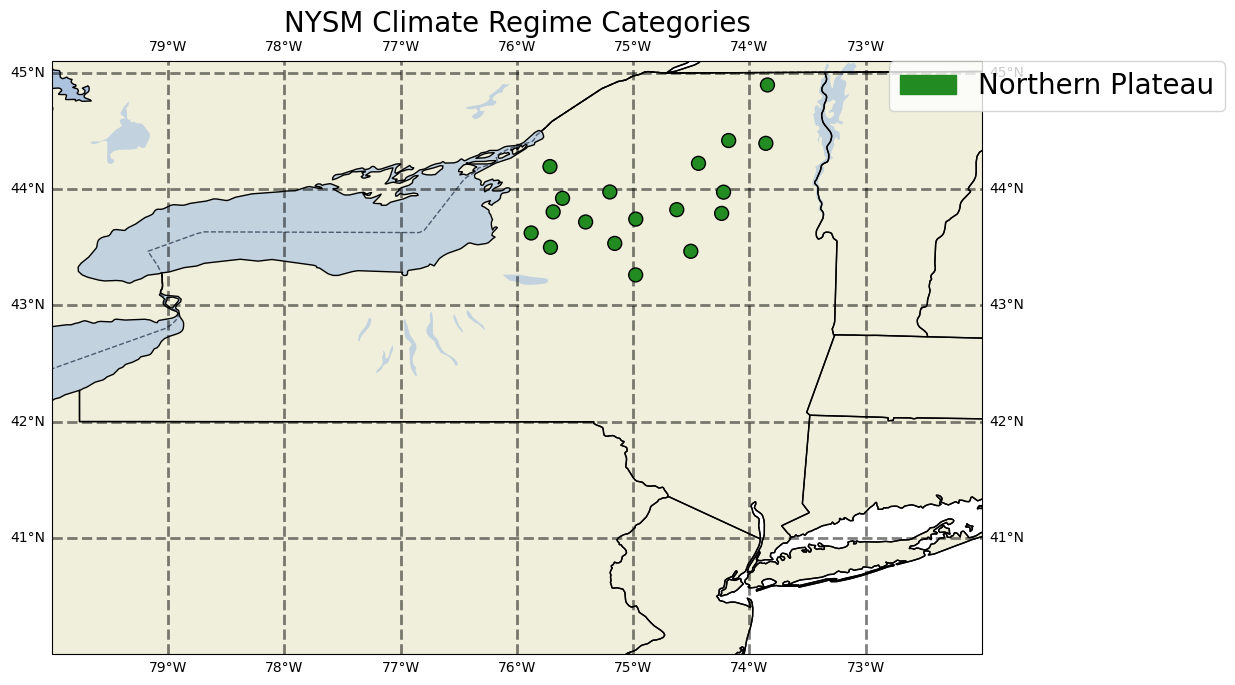

In [11]:
landtype(nysm_cats_df)

In [12]:
subset_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/NLCD_nam.csv")

In [13]:
subset_df.iloc[90:114]

,site,11,21,22,23,24,31,41,42,43,52,71,81,82,90,95,0,station
90,91,0.384487,7.908647,5.355750,1.800640,0.437025,0.145675,21.604496,0.351053,5.119326,0.558023,0.288166,18.967219,25.701708,10.375571,1.002213,0.0,RUSH
91,92,1.043516,2.751666,2.524018,0.916957,0.221279,0.649511,38.079167,16.944593,17.655393,2.100563,3.894677,6.399592,1.072171,5.048037,0.698861,0.0,SARA
92,93,14.956819,5.414096,1.211446,0.275401,0.046165,0.182274,48.239742,1.961237,10.584630,1.338799,0.233215,10.399968,3.600111,1.416803,0.139292,0.0,SBRI
93,94,6.616313,3.200312,4.066251,2.536532,0.645475,0.534844,14.755977,5.088982,22.820031,0.902550,0.705167,15.335392,15.349718,6.565375,0.877081,0.0,SCHA
94,95,0.425827,4.191407,6.311785,4.124548,0.932043,0.370111,34.201436,2.740413,7.025741,0.586606,0.512584,21.376494,9.378532,7.351279,0.471195,0.0,SCHO
95,96,3.253333,4.370149,4.192637,2.407164,0.874030,0.573134,20.253134,5.052338,6.865672,0.454527,0.441791,17.120000,22.642786,10.646766,0.852537,0.0,SCHU
96,97,6.898583,3.235950,2.065754,0.511861,0.180704,0.020697,12.920713,0.547683,0.839038,0.756249,0.090750,7.282280,57.728865,6.701958,0.218914,0.0,SCIP
97,98,0.514180,4.703232,1.423944,0.754555,0.202170,0.087554,34.006702,7.001122,13.121135,0.568304,0.655062,22.538743,8.971879,4.729498,0.721921,0.0,SHER
98,99,3.115399,21.071525,14.775459,7.700941,1.864941,0.066861,38.506296,0.187847,2.846363,0.136906,0.450515,3.748189,0.175112,5.282806,0.070841,0.0,SOME
99,100,46.167620,6.796495,6.695423,4.910348,0.996395,1.171480,5.581244,0.188615,4.125648,0.064463,1.373624,15.326335,4.366788,0.408267,1.827254,0.0,SOUT


In [14]:
subset_df = subset_df.drop(columns=["site"])

In [15]:
subset_df.shape

(126, 17)

In [16]:
def get_score_elev(df, represent_df):
    class1 = (represent_df.shape[1]) * 2.5
    class2 = (represent_df.shape[1]) * 5
    class3 = (represent_df.shape[1]) * 7.5
    class4 = (represent_df.shape[1]) * 10
    class5 = (represent_df.shape[1]) * 12.5

    df["score"] = 00

    for i, _ in enumerate(df["summed"]):
        if df["summed"].iloc[i] > class4:
            df["score"].iloc[i] = 5
        if df["summed"].iloc[i] <= class4:
            df["score"].iloc[i] = 4
        if df["summed"].iloc[i] < class3:
            df["score"].iloc[i] = 3
        if df["summed"].iloc[i] < class2:
            df["score"].iloc[i] = 2
        if df["summed"].iloc[i] < class1:
            df["score"].iloc[i] = 1
    return df

In [17]:
def get_score(df, represent_df):
    class1 = (represent_df.shape[1] - 1) * 2.5
    class2 = (represent_df.shape[1] - 1) * 5
    class3 = (represent_df.shape[1] - 1) * 7.5
    class4 = (represent_df.shape[1] - 1) * 10
    class5 = (represent_df.shape[1] - 1) * 12.5

    df["score"] = 00

    for i, _ in enumerate(df["summed"]):
        if df["summed"].iloc[i] > class4:
            df["score"].iloc[i] = 5
        if df["summed"].iloc[i] <= class4:
            df["score"].iloc[i] = 4
        if df["summed"].iloc[i] < class3:
            df["score"].iloc[i] = 3
        if df["summed"].iloc[i] < class2:
            df["score"].iloc[i] = 2
        if df["summed"].iloc[i] < class1:
            df["score"].iloc[i] = 1
    return df

In [18]:
# directory = os.listdir('/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/clean/elev/')

# sorted_dir = sorted(directory)
# score_df = pd.DataFrame()

# station_ls = []
# score_ls = []

# cats = ['Central Lakes',
#  'Champlain Valley',
#  'Coastal',
#  'Eastern Plateau',
#  'Great Lakes',
#  'Hudson Valley',
#  'Mohawk Valley',
#  'Northern Plateau',
#  'St. Lawrence Valley',
#  'Western Plateau']

# n=0
# for file in sorted_dir:
#     print(file)
#     represent_df = pd.read_csv(f'/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/clean/elev/{file}')
#     # Add the site number and pivot the DataFrame to have aspects as columns.
#     represent_df["site"] = 1
#     represent_df = represent_df.pivot(index="site", columns="Value", values="Percentage")
#     print(cats[n])
#     nysm_subset = nysm_cats_df[nysm_cats_df['climate_division_name'] == cats[n]]
#     stations_in_cat = nysm_subset['stid'].to_list()
#     for s in stations_in_cat:
#         station_ls.append(s)

#     compare_df = subset_df[subset_df['station'].isin(stations_in_cat)]
#     compare_df = compare_df.drop(columns='station')

#     for col in compare_df.columns:
#         if float(col) in represent_df.keys():
#             compare_df[col] = abs(represent_df[float(col)].iloc[0] - compare_df[col])
#         else:
#             continue

#     compare_df['summed'] = 00

#     for i in range(compare_df.shape[0]):
#         compare_df['summed'].iloc[i] = sum(compare_df.iloc[i])

#     # print(compare_df['summed'])
#     compare_df = get_score_elev(compare_df, represent_df)
#     my_scores = compare_df['score'].to_list()
#     for score in my_scores:
#         score_ls.append(score)

#     n+=1

In [19]:
directory = os.listdir(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/clean/nlcd/"
)

sorted_dir = sorted(directory)
score_df = pd.DataFrame()

station_ls = []
score_ls = []

cats = [
    "Central Lakes",
    "Champlain Valley",
    "Coastal",
    "Eastern Plateau",
    "Great Lakes",
    "Hudson Valley",
    "Mohawk Valley",
    "Northern Plateau",
    "St. Lawrence Valley",
    "Western Plateau",
]

n = 0
for file in sorted_dir:
    print(file)
    represent_df = pd.read_csv(
        f"/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/clean/nlcd/{file}"
    )
    # Add the site number and pivot the DataFrame to have aspects as columns.

    stations_in_cat = represent_df["station"].to_list()
    for s in stations_in_cat:
        station_ls.append(s)

    compare_df = subset_df[subset_df["station"].isin(stations_in_cat)]
    compare_df = compare_df.drop(columns="station")

    for col in compare_df.columns:
        if col in represent_df.keys():
            compare_df[col] = abs(represent_df[col].iloc[0] - compare_df[col])
        else:
            continue

    compare_df["summed"] = 00

    for i in range(compare_df.shape[0]):
        compare_df["summed"].iloc[i] = sum(compare_df.iloc[i])

    compare_df = get_score(compare_df, represent_df)
    my_scores = compare_df["score"].to_list()
    for score in my_scores:
        score_ls.append(score)

    n += 1

nlcd_central_lakes.csv
nlcd_champlain_valley.csv
nlcd_coastal.csv
nlcd_eastern_plateau.csv
nlcd_great_lakes.csv
nlcd_hudson_valley.csv
nlcd_mohawk_valley.csv
nlcd_northern_plateau.csv
nlcd_st_lawrence.csv
nlcd_western_plateau.csv


/tmp/tmp.MCkLYIujor/ipykernel_2694918/555448305.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/tmp.MCkLYIujor/ipykernel_2694918/555448305.py:48: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '52.38894771360857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/tmp.MCkLYIujor/ipykernel_2694918/2193175661.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/tmp.MCkLYIujor/ipykernel_2694918/2193175661.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a Data

In [20]:
compare_df

,11,21,22,23,24,31,41,42,43,52,71,81,82,90,95,0,summed,score
0,0.880905,0.311074,0.830779,0.447617,0.146424,0.066987,15.241518,0.448292,11.815794,0.247412,0.201567,13.033836,5.302691,1.951339,0.291756,0.0,51.217994,2
6,0.236245,0.330299,0.202243,0.115740,0.113795,0.222719,10.769577,4.160701,5.514959,0.229152,0.115197,3.428792,0.892003,0.819615,0.138183,0.0,27.289221,1
28,1.101402,0.636999,0.291170,0.260580,0.101853,0.045500,12.069440,0.877291,1.015698,0.071536,0.487720,3.756022,15.085412,0.271710,1.077254,0.0,37.149586,1
34,0.185681,0.342707,0.048373,0.114114,0.090707,0.500536,5.605443,0.292983,6.820206,0.184551,0.337300,9.088874,3.090692,0.419029,0.123027,0.0,27.244224,1
43,0.304930,6.328741,11.830099,9.056841,4.069385,0.157446,12.017743,2.576730,5.450668,0.032683,0.247301,3.966476,6.755507,1.397481,0.137179,0.0,64.329208,2
51,0.982812,0.191052,0.810162,0.473901,0.159162,0.110768,9.762949,1.927327,5.886566,0.488752,0.140292,0.472627,3.239181,0.354819,0.302939,0.0,25.303311,1
55,1.019422,1.087947,1.220050,0.532001,0.173488,0.102013,15.545000,0.700684,2.432004,0.013450,0.045957,0.581314,6.329660,2.077151,0.484403,0.0,32.344543,1
73,0.061028,2.314525,5.171855,3.167816,1.181305,0.021616,4.304104,0.485482,4.823275,0.011802,0.170164,4.784342,5.578936,1.226986,0.354645,0.0,33.657882,1
85,0.939817,0.875147,0.205567,0.054642,0.060459,0.143946,4.182538,1.251292,0.186973,0.472141,0.009365,2.703962,0.868357,1.181626,0.262235,0.0,13.398065,1


In [21]:
represent_df

,site,11,21,22,23,24,31,41,42,43,52,71,81,82,90,95,station
0,1,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,ADDI
1,2,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,BELM
2,3,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,COHO
3,4,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,DELE
4,5,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,ELMI
5,6,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,GROV
6,7,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,HART
7,8,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,OLEA
8,9,1.109361,4.899631,1.399133,0.588512,0.174284,0.111564,42.516127,3.649585,16.2803,0.604822,0.273209,18.027409,7.325362,2.448848,0.591853,RAND


In [22]:
score_df["station"] = station_ls
score_df["aspect_slope_score"] = score_ls
score_df = score_df.sort_values(by="station")
# score_df.to_csv('/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/aspect_slope_scores.csv')

In [23]:
score_df["aspect_slope_score"].unique()

array([2, 3, 1, 4])

In [24]:
trial_df = score_df[score_df["aspect_slope_score"] == 1]
trial_df

,station,aspect_slope_score
118,BELM,1
30,BERK,1
32,BROO,1
87,CAMD,1
33,CINC,1
119,COHO,1
93,COLD,1
70,COPA,1
120,DELE,1
36,DEPO,1


In [25]:
lons = nysm_cats_df["lon [degrees]"].to_list()
lats = nysm_cats_df["lat [degrees]"].to_list()

In [26]:
elev_scores_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/elev_scores.csv"
)
aspect_scores_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/aspect_slope_scores.csv"
)
nlcd_scores_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/nlcd_scores.csv"
)

In [27]:
elev_scores_df["color"] = elev_scores_df["elev_score"].map(score_dict)
aspect_scores_df["color"] = aspect_scores_df["aspect_slope_score"].map(score_dict)
nlcd_scores_df["color"] = nlcd_scores_df["nlcd_score"].map(score_dict)

In [28]:
# get hudson valley
sub_stations = nysm_cats_df["stid"].to_list()

elev_scores_df = elev_scores_df[elev_scores_df["station"].isin(sub_stations)]
aspect_scores_df = aspect_scores_df[aspect_scores_df["station"].isin(sub_stations)]
nlcd_scores_df = nlcd_scores_df[nlcd_scores_df["station"].isin(sub_stations)]

In [29]:
elev_scores_df["lat"] = lats
elev_scores_df["lon"] = lons
aspect_scores_df["lat"] = lats
aspect_scores_df["lon"] = lons
nlcd_scores_df["lat"] = lats
nlcd_scores_df["lon"] = lons

In [30]:
elev_scores_df

,Unnamed: 0,station,elev_score,color,lat,lon
29,93,COLD,1,springgreen,43.261268,-74.978778
31,94,COPE,1,springgreen,43.920564,-75.607866
32,95,CROG,1,springgreen,43.974960,-75.201000
42,96,ELLE,1,springgreen,44.895500,-73.845020
47,97,GABR,1,springgreen,44.417420,-74.178670
49,98,GFLD,1,springgreen,43.716800,-75.409250
54,99,HARR,1,springgreen,43.803520,-75.688530
58,100,ILAK,1,springgreen,43.790670,-74.239330
70,101,NEWC,1,springgreen,43.973290,-74.222730
72,102,OLDF,1,springgreen,43.741570,-74.977860


In [31]:
scores(elev_scores_df, "elev", "Elevation")

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


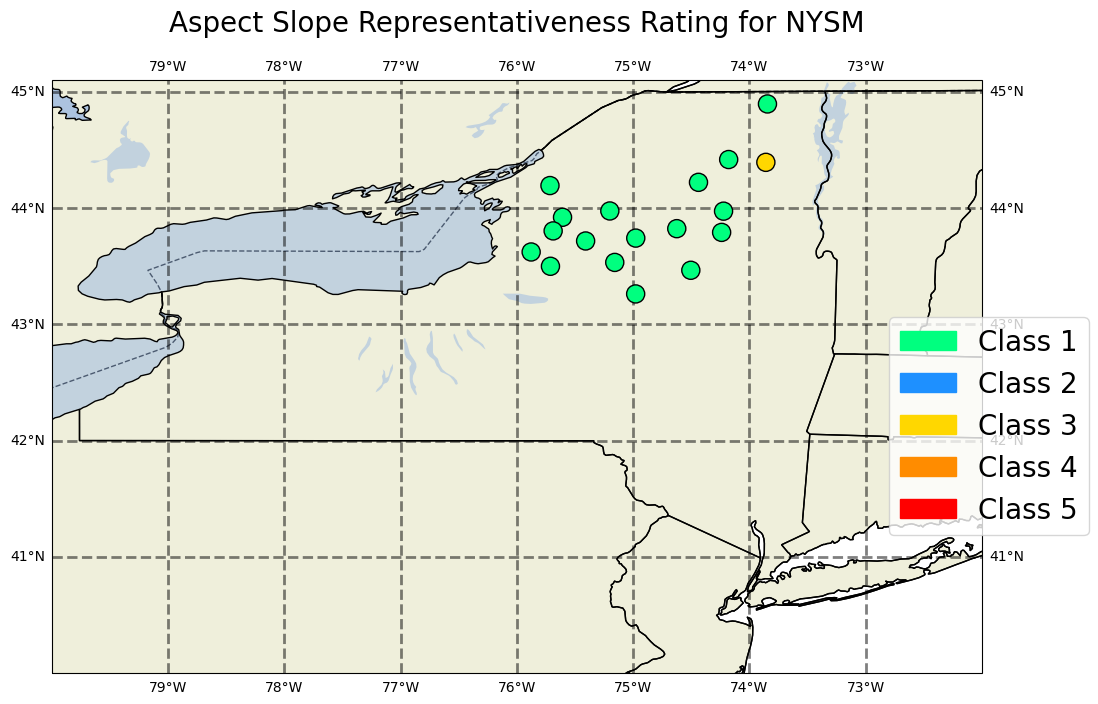

In [ ]:
scores(aspect_scores_df, "aspect_slope", "Aspect Slope")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


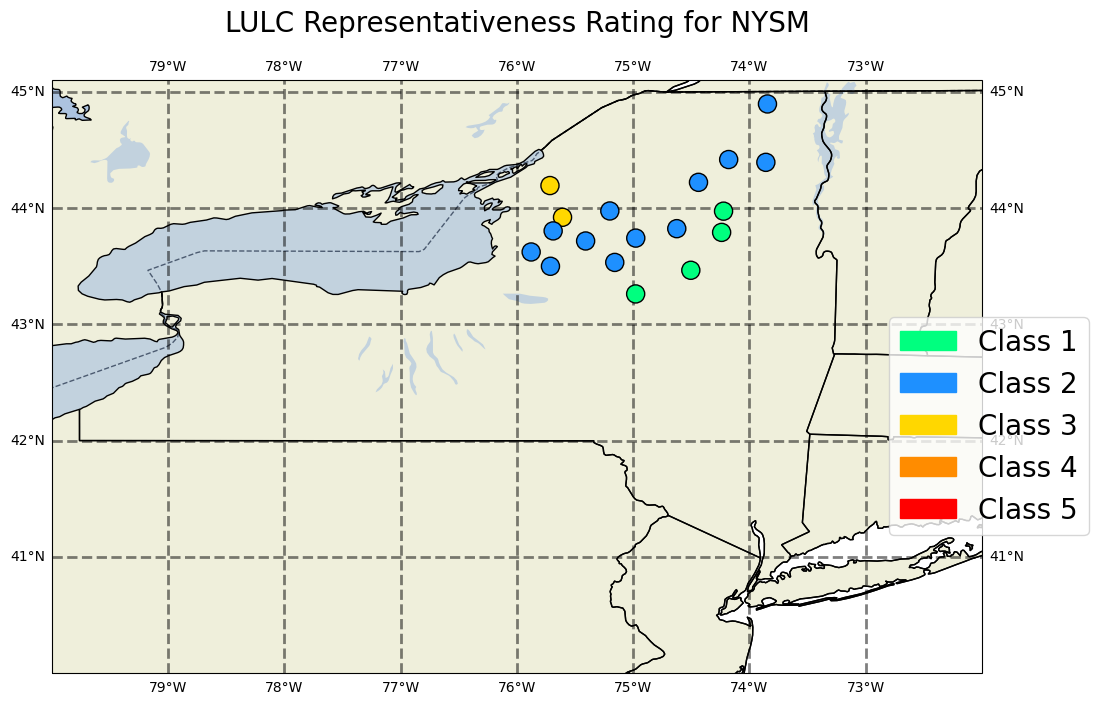

In [ ]:
scores(nlcd_scores_df, "nlcd", "LULC")

In [ ]:
wmo_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/notebooks/WMO_rates.csv")
wmo_df

,Station ID,Station Position Description,Roughness (within 100 m),T & RH Class,Precipitation Class,Wind Class,Direct Radiation Class,Global/Diffuse Radiation Class,Greatest slope (4 cardinal directions),Added Slopes (4 cardinal directions),Added slopes >20?,Obstructions (within 100m),Angular height of nearest obstacle,Distance from artificial heat sources/bodies of water,Angular height of surrounding vegetation within 100m,Angular height of nearest thin obstacle,Angular width of nearest thin obstacle,Surrounding terrain greatest relief change
0,ADDI,Open area in a cow pasture with some small tre...,Class 4,Class 1,Class 2,Class 1,Class 2,Class 1,8.47,14.15,NaN,Trees,22,NaN,NaN,22,NaN,6
1,ANDE,"Flat, open field with treeline surrounding fro...",Class 5,Class 1,Class 2,Class 2,Class 3,Class 2,12.55,33.44,Y,"Trees, power lines",?,?,?,20,1,15
2,BSPA,"Flat, open area with trees and buildings nearby",Class 6,Class 2,Class 2,Class 2,Class 3,Class 2,6.23,11.94,NaN,"Building, trees, paved road",15,85yd,8,15,2-Jan,17
3,BATA,Large open field with a tower and treeline to ...,Class 3,Class 1,Class 1,Class 1,Class 1,Class 1,5.67,10.44,NaN,"Tower, gravel path",8,100+,2,8,?,7
4,BEAC,Field with varying vegetation and a tower nearby,Class 4,Class 2,Class 3,Class 3,Class 3,Class 2,11.75,17.97,NaN,"Tower, trees, power lines, fence",?,NaN,NaN,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# extract wanted info
nysm_cats_df = nysm_cats_df.drop(
    columns=[
        "number",
        "name",
        "county",
        "nearest_city",
        "state",
        "distance_from_town [km]",
        "direction_from_town [degrees]",
        "wfo",
        "commissioned",
        "decommissioned",
    ]
)
nysm_cats_df

In [ ]:
nysm_cats_df

In [ ]:
# import geophysical information
# buffer of 12 km diameter
# LULC
lulc_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/nlcd_nam.csv")
# elevation
elev_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/elev_nam.csv")
# aspect/slope
asp_slop_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/aspect_nam.csv")

In [ ]:
lulc_df.head(10)

In [ ]:
def final_examine(df1, df2, df3):
    stations_ls = df1["station"].tolist()
    first_vals = df1["finals"].tolist()
    second_vals = df2["finals"].tolist()
    third_vals = df3["finals"].tolist()

    the_df = pd.DataFrame()
    the_df["finals_1"] = first_vals
    the_df["finals_2"] = second_vals
    the_df["finals_3"] = third_vals
    the_df["sums"] = the_df.sum(axis=1)

    the_df["station"] = stations_ls
    the_df["finals"] = (the_df["sums"] - the_df["sums"].mean()) / the_df["sums"].std()
    return the_df

In [ ]:
def get_rate_final(df):
    rate_ls = []
    for val in df["finals"]:
        if abs(val) <= 0.5:
            rate = "A"
        if abs(val) <= 1.0 and abs(val) > 0.5:
            rate = "B"
        if abs(val) <= 1.5 and abs(val) > 1.0:
            rate = "C"
        if abs(val) > 1.5:
            rate = "D"
        rate_ls.append(rate)
    return rate_ls

In [ ]:
def get_rate(ls):
    rate_ls = []
    for val in ls:
        if abs(val) <= 0.5:
            rate = "A"
        if abs(val) <= 1.0 and abs(val) > 0.5:
            rate = "B"
        if abs(val) <= 1.5 and abs(val) > 1.0:
            rate = "C"
        if abs(val) > 1.5:
            rate = "D"
        rate_ls.append(rate)
    return rate_ls


def final_eval(df1, df2, df3, clim_div_int):
    stations_ls = df1["station"].tolist()
    first_vals = df1["finals"].tolist()
    second_vals = df2["finals"].tolist()
    third_vals = df3["finals"].tolist()

    rate_ls_lulc = get_rate(first_vals)
    rate_ls_elev = get_rate(second_vals)
    rate_ls_aspect = get_rate(third_vals)

    cluster_df = pd.DataFrame()
    cluster_df["station"] = stations_ls
    cluster_df["lulc"] = rate_ls_lulc
    cluster_df["elev"] = rate_ls_elev
    cluster_df["aspect_slope"] = rate_ls_aspect
    # cluster_df.to_csv(f'/home/aevans/nwp_bias/src/landtype/data/org_nysm_clusters_eval/nysm_cluster_{clim_div_int}_georating.csv')

    return cluster_df

In [ ]:
def stat_scatterplot_rates(stack_df1):
    # plot
    projPC = crs.PlateCarree()
    latN = stack_df1["lat"].max() + 2
    latS = stack_df1["lat"].min() - 2
    lonW = stack_df1["lon"].max() + 2
    lonE = stack_df1["lon"].min() - 2
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 12), subplot_kw={"projection": crs.PlateCarree()}, dpi=400
    )
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Scatter Plot of Representative Elevation Rates")
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    # ax.xticklabels_top = False
    # ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    for i, _ in enumerate(stack_df1["rates"]):
        if stack_df1["rates"].iloc[i] == "A":
            a1 = ax.scatter(
                stack_df1["lon"].iloc[i],
                stack_df1["lat"].iloc[i],
                c="green",
                s=70,
                edgecolor="black",
                label=stack_df1["rates"].iloc[i],
            )
        if stack_df1["rates"].iloc[i] == "B":
            b1 = ax.scatter(
                stack_df1["lon"].iloc[i],
                stack_df1["lat"].iloc[i],
                c="blue",
                s=70,
                edgecolor="black",
                label=stack_df1["rates"].iloc[i],
            )
        if stack_df1["rates"].iloc[i] == "C":
            c1 = ax.scatter(
                stack_df1["lon"].iloc[i],
                stack_df1["lat"].iloc[i],
                c="orange",
                s=70,
                edgecolor="black",
                label=stack_df1["rates"].iloc[i],
            )
        if stack_df1["rates"].iloc[i] == "D":
            d1 = ax.scatter(
                stack_df1["lon"].iloc[i],
                stack_df1["lat"].iloc[i],
                c="red",
                s=70,
                edgecolor="black",
                label=stack_df1["rates"].iloc[i],
            )

    colors = ["green", "blue", "orange", "red"]
    leg_str = ["A", "B", "C", "D"]
    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="best",
        borderaxespad=0,
        handles=patches,
        fontsize="xx-large",
    )
    plt.show()

In [ ]:
# need to import 30 km data
nlcd30 = pd.read_csv("/home/aevans/nwp_bias/src/landtype/notebooks/nlcd_30.csv")
# aspect30 =
# elev30 =

# need to import 12 km data
nlcd12 = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/nlcd_nam.csv")
# aspect12 =
# elev30 =

# create function to loop through columns of 12km and 30km dataframe to compare

nlcd30.head()

In [ ]:
nlcd12.head()

In [ ]:
# isolate climate division

In [ ]:
def main(clim_div_int):
    # import geophysical information
    # buffer of 12 km diameter
    # LULC
    lulc_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/nlcd_nam.csv")
    # elevation
    elev_df = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/elev_nam.csv")
    # aspect/slope
    asp_slop_df = pd.read_csv(
        "/home/aevans/nwp_bias/src/correlation/data/aspect_nam.csv"
    )

    # concat and get first clim division
    clim1_df = pd.concat([nysm_cats_df, lulc_df, elev_df, asp_slop_df], axis=1)
    clim1_df = clim1_df[clim1_df["climate_division"] == clim_div_int]
    lons = clim1_df["lon [degrees]"].tolist()
    lats = clim1_df["lat [degrees]"].tolist()
    elevs = clim1_df["elev"].tolist()

    # LULC
    print("LULC")
    stack_df = lulc_df[lulc_df["station"].isin(clim1_df["stid"])]
    stack_df_fid = get_represents.get_represent(stack_df)
    stack_df_fid["lon"] = lons
    stack_df_fid["lat"] = lats
    # stat_scatterplot.stat_scatterplot(stack_df_fid, 'LULC')
    stacks.stacks(stack_df)

    # ELEVATION
    print("Elevation")
    stack_df1 = elev_df[elev_df["station"].isin(clim1_df["stid"])]
    stack_df_fid1 = get_represents.get_represent_elev(stack_df1)
    stack_df_fid1["lon"] = lons
    stack_df_fid1["lat"] = lats
    # stat_scatterplot.stat_scatterplot(stack_df_fid1, 'Elevation Analysis')

    # ASPECT/SLOPE
    print("Aspect/Slope")
    stack_df_1 = asp_slop_df[asp_slop_df["station"].isin(clim1_df["stid"])]
    stack_df_fid_1 = get_represents.get_represent_aspect(stack_df_1)
    stack_df_fid_1["lon"] = lons
    stack_df_fid_1["lat"] = lats
    # stat_scatterplot.stat_scatterplot(stack_df_fid_1, 'Aspect/Slope')

    station_ls = rose_plot.get_stations(stack_df_1)
    formatted_df = rose_plot.format_df(station_ls)
    # rose_plot.rose_plot(formatted_df)

    # final analysis
    final_df = final_examine(stack_df_fid, stack_df_fid1, stack_df_fid_1)
    final_df["lon"] = lons
    final_df["lat"] = lats
    final_df["rates"] = get_rate_final(final_df)
    cluster_df = final_eval(stack_df_fid, stack_df_fid1, stack_df_fid_1, clim_div_int)
    final_df["elev"] = elevs

    a_list = []
    for i, _ in enumerate(final_df["rates"]):
        if final_df["rates"].iloc[i] == "A" or final_df["rates"].iloc[i] == "B":
            a_list.append(final_df["station"].iloc[i])
    stack_df = stack_df[stack_df["station"].isin(a_list)]
    stacks.stacks(stack_df)
    for station in a_list:
        print(station)
        formatted_df = rose_plot.format_df_single(station)
        # rose_plot.rose_plot(formatted_df)
    # stat_scatterplot.stat_scatterplot(final_df, 'All Vars')
    print(cluster_df)

    return final_df

# Climate Division 1

In [ ]:
final_df1 = main(1)

In [ ]:
stat_scatterplot_rates(final_df1)

In [ ]:
final_df1

# Climate Division 2

In [ ]:
final_df2 = main(2)

In [ ]:
stat_scatterplot_rates(final_df2)

# CLIM DIV 3

In [ ]:
final_df3 = main(3)

In [ ]:
stat_scatterplot_rates(final_df3)

# climdiv 4

In [ ]:
final_df4 = main(4)

In [ ]:
stat_scatterplot_rates(final_df4)

# clim div 5 

In [ ]:
final_df5 = main(5)

In [ ]:
stat_scatterplot_rates(final_df5)

# clim div 6

In [ ]:
final_df6 = main(6)

In [ ]:
stat_scatterplot_rates(final_df6)

# clim div 7

In [ ]:
final_df7 = main(7)

In [ ]:
stat_scatterplot_rates(final_df7)

# clim div 8 

In [ ]:
final_df8 = main(8)

In [ ]:
stat_scatterplot_rates(final_df8)

# clim div 9

In [ ]:
final_df9 = main(9)

In [ ]:
stat_scatterplot_rates(final_df9)

# clim div 10

In [ ]:
final_df10 = main(10)

In [ ]:
stat_scatterplot_rates(final_df10)